# Nomes: Brainer Sueverti de Campos e Pedro Malandrin Klesse

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns

# Leitura do CSV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
videogames = pd.read_csv("/content/drive/MyDrive/Datasets/vgsales.csv")
videogames.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


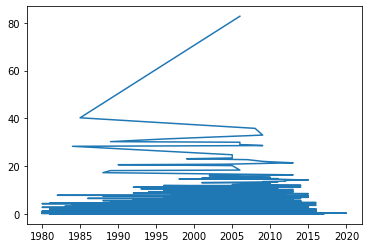

In [ ]:
plt.plot(videogames['Year'],videogames['Global_Sales'])

# Tamanho do Dataset

In [ ]:
videogames.shape

(16598, 11)

# Colunas do Dataset

In [ ]:
print(videogames.columns)

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


# Tipo de Dados de cada coluna

In [ ]:
videogames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# Análise Estatística Generalizada dos Dados

In [ ]:
videogames.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# Vendas por Região

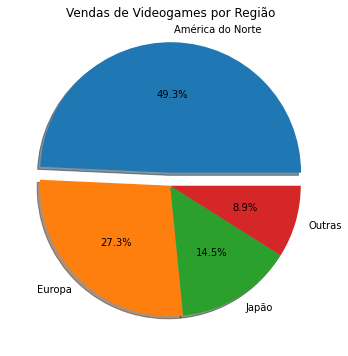

In [ ]:
lista = []
regions = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
regions_labels = ['América do Norte', 'Europa','Japão', 'Outras']
explode = [0.1,0,0,0]
for region in regions:
  lista.append(videogames[region].sum())
fig, ax = plt.subplots(figsize=(14,6))
ax = plt.pie(lista,labels=regions_labels,autopct='%1.1f%%',shadow=True,explode=explode)
plt.title('Vendas de Videogames por Região')
plt.show()

# Vendas da Nintendo por Região

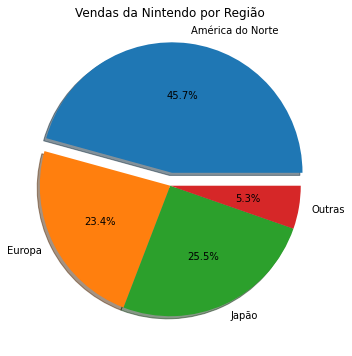

In [ ]:
lista2 = []
df_nintendo = videogames[videogames['Publisher']=='Nintendo']
for region in regions:
  lista2.append(df_nintendo[region].sum())
fig, ax = plt.subplots(figsize=(14,6))
ax = plt.pie(lista2,labels=regions_labels,autopct='%1.1f%%',shadow=True,explode=explode)
plt.title("Vendas da Nintendo por Região")
plt.show()

# Vendas Global por Plataforma

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


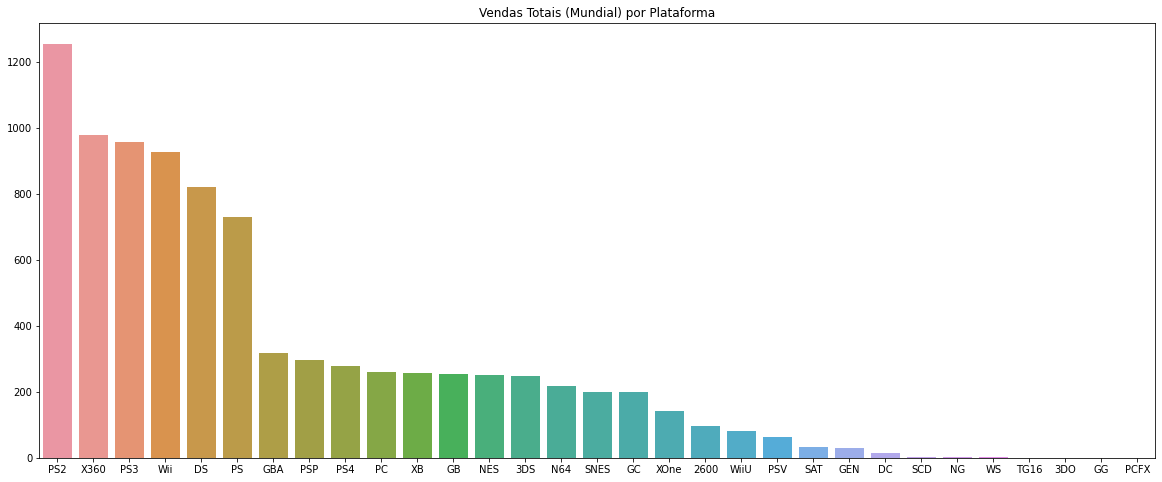

In [ ]:
platforms = (videogames['Platform'].unique()).tolist()
platform_sale = []
for platform in platforms:
  platform_df = videogames[videogames['Platform']==platform]
  platform_sale.append(platform_df['Global_Sales'].sum())


dict = {}
for platform,sale in zip(platforms,platform_sale):
  dict[platform] = sale
dict

x = []
y=[]
for i in sorted(dict, key=dict.get, reverse=True):
  x.append(i)
  y.append(dict[i])

fig, aux = plt.subplots(figsize=(20,8))
sns.barplot(x,y)
plt.title('Vendas Totais (Mundial) por Plataforma')
plt.show()


# Top 5 Jogos Vendidos para Playstation 2

*   Item da lista
*   Item da lista



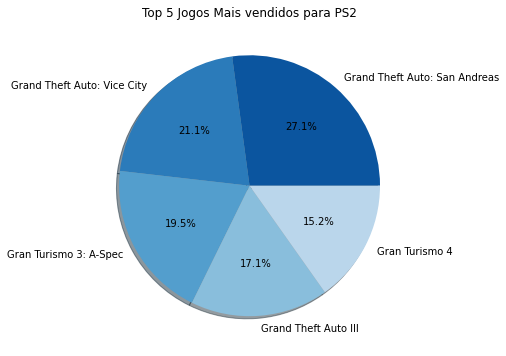

In [ ]:
videogames_ps2 = videogames[videogames['Platform']=='PS2']
top5_videogames_ps2 = videogames_ps2.sort_values(by='Global_Sales',ascending=False)
colors = sns.color_palette('Blues_r')
fig, aux = plt.subplots(figsize=(14,6))
plt.pie(top5_videogames_ps2['Global_Sales'][:5],labels=top5_videogames_ps2['Name'][:5],autopct='%1.1f%%',shadow=True,colors=colors)
plt.title('Top 5 Jogos Mais vendidos para PS2')
plt.show()

# Top 5 Jogos Vendidos para XBOX 360

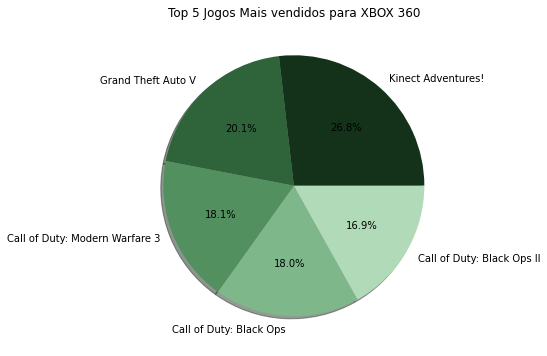

In [ ]:
videogames_xbox360 = videogames[videogames['Platform']=='X360']
top5_videogames_xbox360 = videogames_xbox360.sort_values(by='Global_Sales',ascending=False)
colors = sns.cubehelix_palette(start=2, rot=0, light=.95, reverse=True)
fig, aux = plt.subplots(figsize=(14,6))
aux = plt.pie(top5_videogames_xbox360['Global_Sales'][:5],labels=top5_videogames_xbox360['Name'][:5],autopct='%1.1f%%',shadow=True,colors=colors)
plt.title('Top 5 Jogos Mais vendidos para XBOX 360')
plt.show()

# Gênero com mais Jogos

In [ ]:
videogames.value_counts('Genre').index[0]

'Action'

# Média e Desvio Padrão das Vendas por Região

In [ ]:
print("\nMédia e Desvio padrão de Vendas por Região\n")
for index,region in enumerate(regions):

  print('Média para ' + regions_labels[index] + ": " + str(round(videogames[region].mean()*1000000)))
  print('Desvio Padrão para '+ regions_labels[index] + ": " + str(round(videogames[region].std()*1000000)))
  print()


Média e Desvio padrão de Vendas por Região

Média para América do Norte: 264667
Desvio Padrão para América do Norte: 816683

Média para Europa: 146652
Desvio Padrão para Europa: 505351

Média para Japão: 77782
Desvio Padrão para Japão: 309291

Média para Outras: 48063
Desvio Padrão para Outras: 188588



# Gênero mais lucrativo em cada Região

In [ ]:
genres = videogames['Genre'].unique()
genres_labels = ['Esportes','Plataforma','Corrida','RPG','Puzzle',
                 'Misc','Tiro','Simulação',
                 'Ação','Luta','Aventura','Estratégia']
best_value = 0
best_genre = 'oi'

for index,region in enumerate(regions):
  for index2,genre in enumerate(genres):
    if videogames[videogames['Genre'] == genre][region].sum() > best_value:
      best_value = videogames[videogames['Genre'] == genre][region].sum()
      best_genre_index = index2
  print(regions_labels[index] + " -> " + genres_labels[best_genre_index])


América do Norte -> Ação
Europa -> Ação
Japão -> Ação
Outras -> Ação


# Projeção de Vendas considerando a crescente até 2008 e Comparação com a Realidade

In [ ]:
MAX_YEAR = 2015.0
years = sorted(videogames[videogames['Year'] <= MAX_YEAR]['Year'].dropna().unique())
global_sales_per_year = []
for year in years:
  global_sales_per_year.append(videogames[videogames['Year']==year]['Global_Sales'].sum())
global_sales_per_year

[11.38,
 35.769999999999996,
 28.860000000000003,
 16.790000000000003,
 50.36,
 53.940000000000005,
 37.06999999999999,
 21.740000000000002,
 47.22,
 73.45000000000002,
 49.39,
 32.23,
 76.16000000000003,
 45.97999999999999,
 79.17,
 88.10999999999999,
 199.14999999999998,
 200.98,
 256.47,
 251.26999999999998,
 201.56,
 331.47,
 395.52000000000004,
 357.84999999999997,
 419.30999999999995,
 459.94,
 521.04,
 611.1300000000001,
 678.8999999999999,
 667.3,
 600.45,
 515.99,
 363.53999999999996,
 368.11,
 337.05,
 264.44]

Text(0, 0.5, 'Videogames Global Sales')

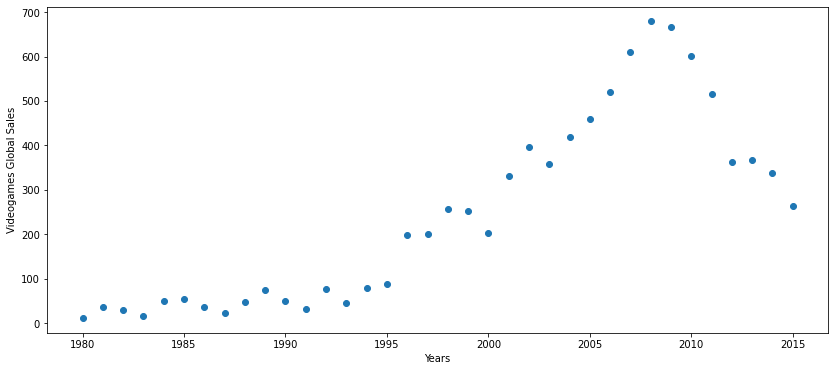

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))
ax = plt.scatter(x=years,y=global_sales_per_year)
plt.xlabel('Years')
plt.ylabel('Videogames Global Sales')

In [ ]:
index_2008 = years.index(2010)+1

index_2016 = years.index(2015)+1

# Número de jogos de PS4 para Anos maiores de 2015 vs. Número de jogos de PS2 para Anos maiores que 2015

In [ ]:
ps4 = videogames[(videogames['Year'] > 2015.0) & (videogames['Platform'] == 'PS4')].shape[0]
ps2 = videogames[(videogames['Year'] > 2015.0) & (videogames['Platform'] == 'PS2')].shape[0]
print('2015 -> PS2: '+ str(ps2) + ' PS4: ' + str(ps4))

ps4 = videogames[(videogames['Year'] > 2000.0) & (videogames['Platform'] == 'PS4')].shape[0]
ps2 = videogames[(videogames['Year'] > 2000.0) & (videogames['Platform'] == 'PS2')].shape[0]
print('2000 -> PS2: '+ str(ps2) + ' PS4: ' + str(ps4))

print('\n')

xone = videogames[(videogames['Year'] > 2015.0) & (videogames['Platform'] == 'XOne')].shape[0]
xb = videogames[(videogames['Year'] > 2015.0) & (videogames['Platform'] == 'XB')].shape[0]
print('2015 -> XBOX: '+ str(xb) + ' PS4: ' + str(xone))

xone = videogames[(videogames['Year'] > 2000.0) & (videogames['Platform'] == 'XOne')].shape[0]
xb = videogames[(videogames['Year'] > 2000.0) & (videogames['Platform'] == 'XB')].shape[0]
print('2000 -> XBOX: '+ str(xb) + ' XBOX One: ' + str(xone))

2015 -> PS2: 0 PS4: 108
2000 -> PS2: 2045 PS4: 336


2015 -> XBOX: 0 PS4: 54
2000 -> XBOX: 802 XBOX One: 213


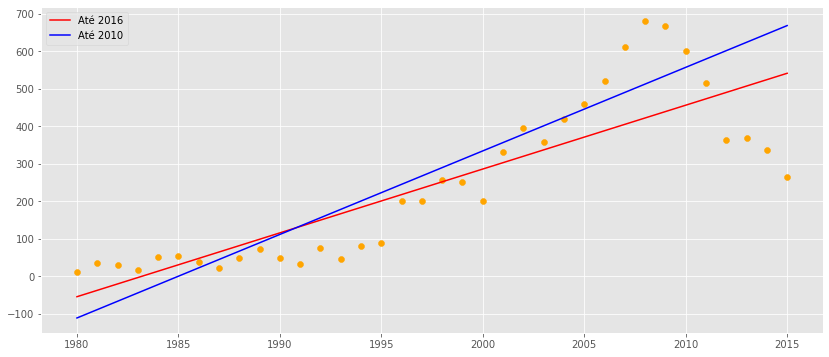

In [ ]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x=years[:index_2016],y=global_sales_per_year[:index_2016],alternative='greater')
x_pred = pd.Series(years)
y_pred = intercept + slope*x_pred
plt.figure(figsize=(14,6))
plt.scatter(years,global_sales_per_year,color='orange')
plt.plot(x_pred,y_pred,'r',label='Até 2016')

# Predição para 2020 considerando apenas dados até 2010
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x=years[:index_2008],y=global_sales_per_year[:index_2008],alternative='greater')
x_pred2 = pd.Series(years)
y_pred2 = intercept2 + slope2*x_pred2
plt.plot(x_pred2,y_pred2,'b',label='Até 2010')
plt.legend()
plt.show()

# O que pode ter ocorrido para o lucro abaixar?

 - Os jogos listados no dataset são os que mais geraram lucro, portanto há poucos jogos no dataset que lançaram pós 2016
 - Incompletude do dataset
 - Gerações antigas tinham mais jogos
 - Global Sales não conta vendas a partir da criação do dataset
 - 2009 ano com mais jogos mais vendidos lançados - FAZER GRÁFICO DE BARRAS

# World Cloud com Publishers

In [ ]:
cloud_string = " ".join(str(s) for s in videogames['Publisher'].dropna())

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
wordcloud = WordCloud(stopwords=stopwords,background_color="black",width=2000,height=1200).generate(cloud_string)

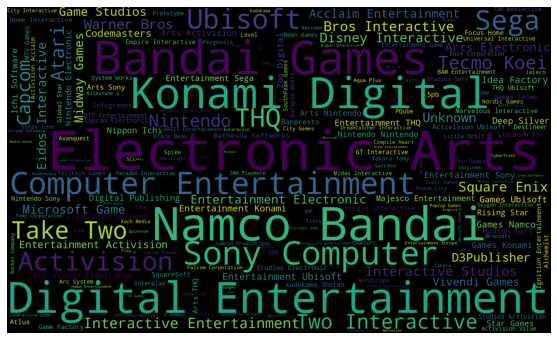

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud,interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)

# Empresas que mais lucraram

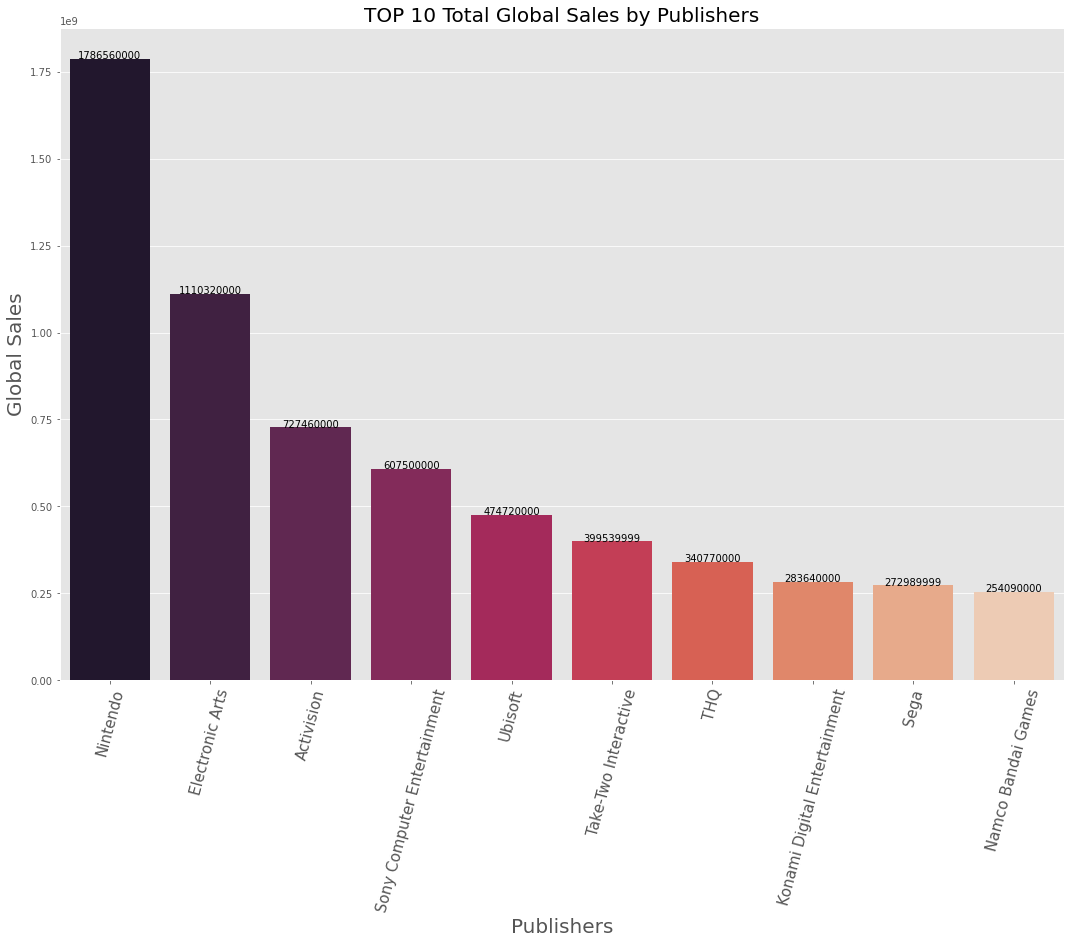

In [ ]:
publi = videogames['Publisher'].unique().tolist()
sales_publi = []
for i in publi:
  sales_publi.append(int(videogames[videogames['Publisher']==i]['Global_Sales'].sum()*1000000))

dict = {}
for publisher,sale in zip(publi,sales_publi):
  dict[publisher] = sale
dict

x = []
y=[]
for i in sorted(dict, key=dict.get, reverse=True):
  x.append(i)
  y.append(dict[i])


data = pd.DataFrame()
data['Publishers'] = x[0:10]
data['Global Sales']= y[0:10]
plt.figure(figsize=(18, 12))
plt.style.use("ggplot")
plt.title('TOP 10 Total Global Sales by Publishers',fontsize = 20)
sns.barplot(x='Publishers', y="Global Sales", data=data,palette = 'rocket')
for i in range(len(data['Global Sales'])):
    plt.text(i,data['Global Sales'][i],data['Global Sales'][i],horizontalalignment='center')
plt.ylabel('Global Sales', fontsize = 20)
plt.xlabel('Publishers', fontsize = 20)
plt.xticks(rotation=75,fontsize =15)

plt.show()



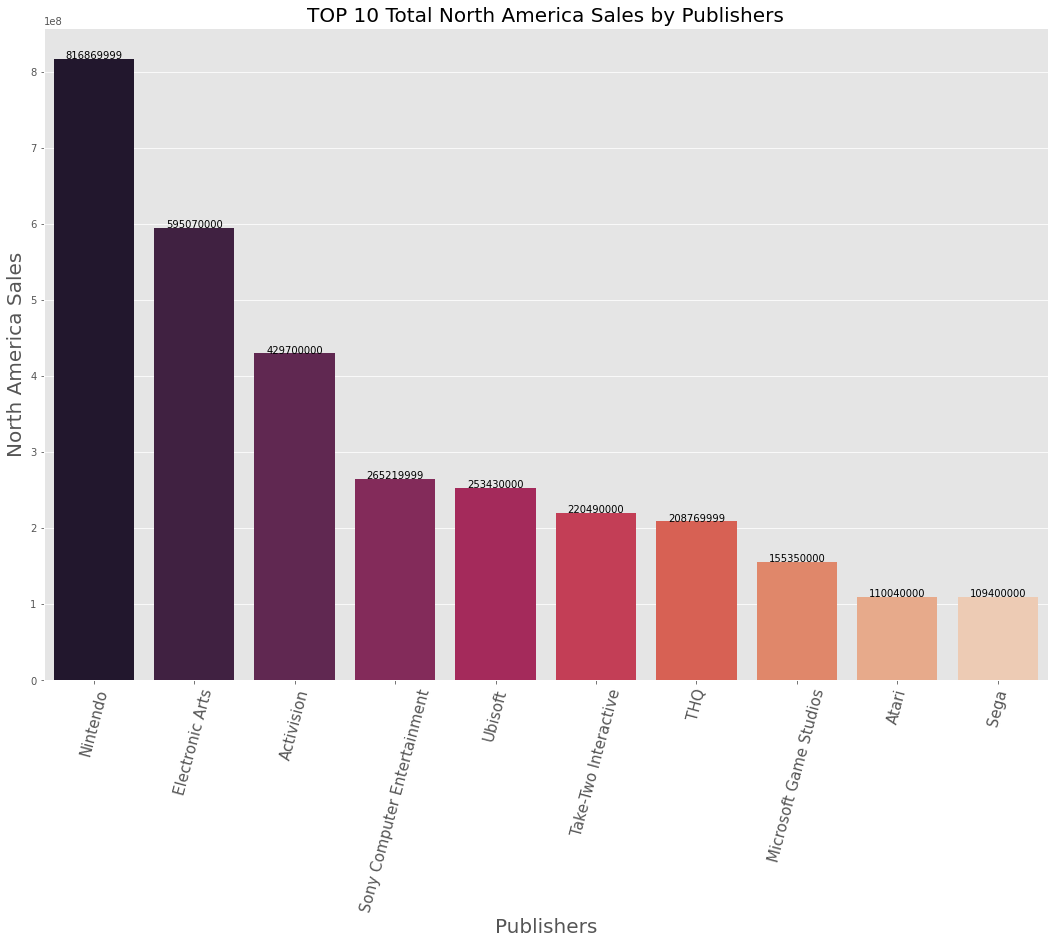

In [ ]:
publi = videogames['Publisher'].unique().tolist()
sales_publi = []
for i in publi:
  sales_publi.append(int(videogames[videogames['Publisher']==i]['NA_Sales'].sum()*1000000))

dict = {}
for publisher,sale in zip(publi,sales_publi):
  dict[publisher] = sale
dict

x = []
y=[]
for i in sorted(dict, key=dict.get, reverse=True):
  x.append(i)
  y.append(dict[i])


data = pd.DataFrame()
data['Publishers'] = x[0:10]
data['NA Sales']= y[0:10]
plt.figure(figsize=(18, 12))
plt.style.use("ggplot")
plt.title('TOP 10 Total North America Sales by Publishers',fontsize = 20)
sns.barplot(x='Publishers', y="NA Sales", data=data,palette = 'rocket')
for i in range(len(data['NA Sales'])):
    plt.text(i,data['NA Sales'][i],data['NA Sales'][i],horizontalalignment='center')
plt.ylabel('North America Sales', fontsize = 20)
plt.xlabel('Publishers', fontsize = 20)
plt.xticks(rotation=75,fontsize =15)
plt.show()

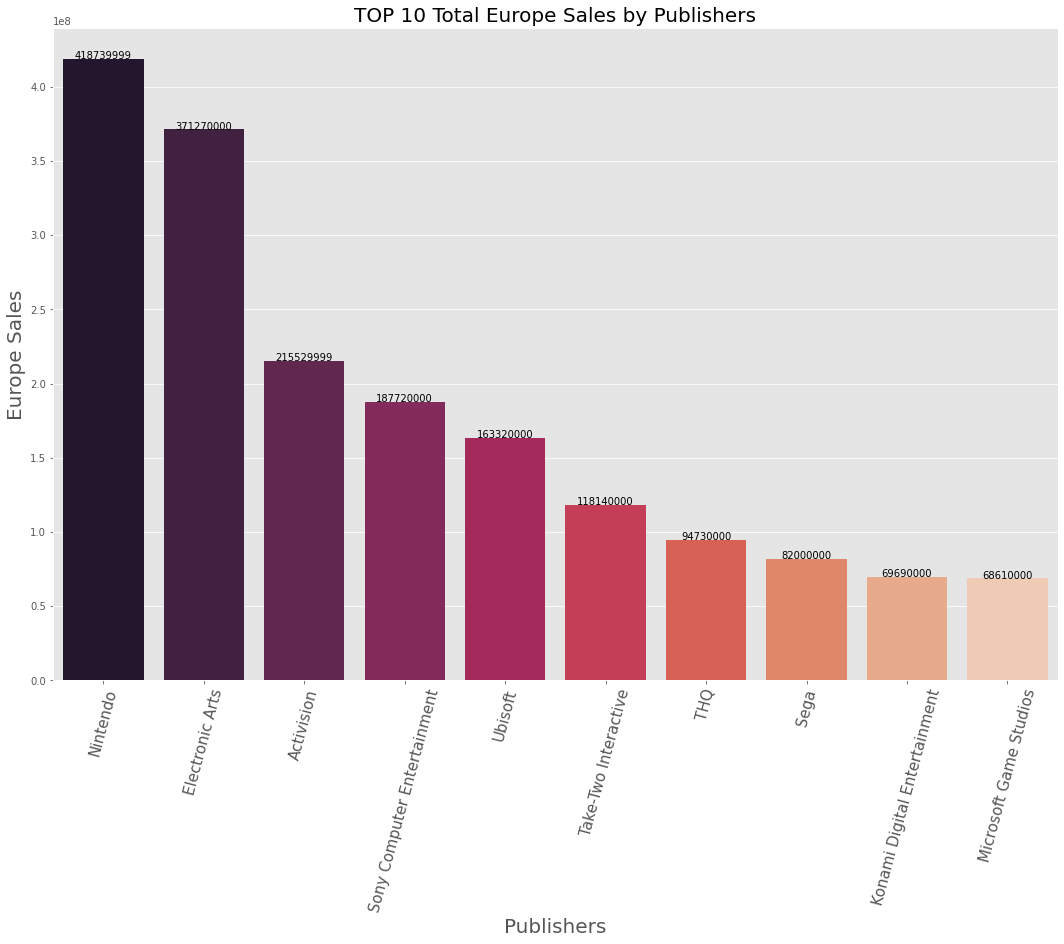

In [ ]:
publi = videogames['Publisher'].unique().tolist()
sales_publi = []
for i in publi:
  sales_publi.append(int(videogames[videogames['Publisher']==i]['EU_Sales'].sum()*1000000))

dict = {}
for publisher,sale in zip(publi,sales_publi):
  dict[publisher] = sale

x = []
y=[]
for i in sorted(dict, key=dict.get, reverse=True):
  x.append(i)
  y.append(dict[i])


data = pd.DataFrame()
data['Publishers'] = x[0:10]
data['EU Sales']= y[0:10]
plt.figure(figsize=(18, 12))
plt.style.use("ggplot")
plt.title('TOP 10 Total Europe Sales by Publishers',fontsize = 20)
sns.barplot(x='Publishers', y="EU Sales", data=data,palette = 'rocket')
for i in range(len(data['EU Sales'])):
    plt.text(i,data['EU Sales'][i],data['EU Sales'][i],horizontalalignment='center')
plt.ylabel('Europe Sales', fontsize = 20)
plt.xlabel('Publishers', fontsize = 20)
plt.xticks(rotation=75,fontsize =15)
plt.show()

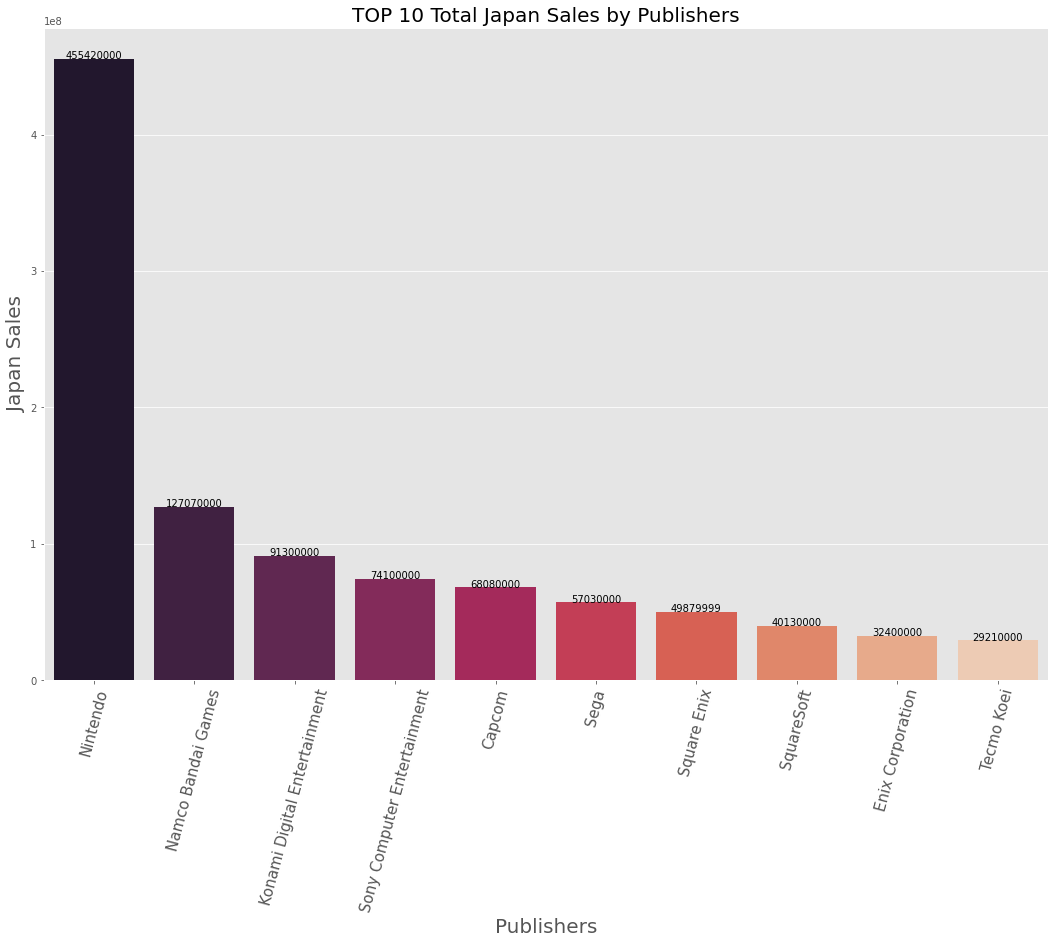

In [ ]:
publi = videogames['Publisher'].unique().tolist()
sales_publi = []
for i in publi:
  sales_publi.append(int(videogames[videogames['Publisher']==i]['JP_Sales'].sum()*1000000))

dict = {}
for publisher,sale in zip(publi,sales_publi):
  dict[publisher] = sale

x = []
y=[]
for i in sorted(dict, key=dict.get, reverse=True):
  x.append(i)
  y.append(dict[i])


data = pd.DataFrame()
data['Publishers'] = x[0:10]
data['JP Sales']= y[0:10]
plt.figure(figsize=(18, 12))
plt.style.use("ggplot")
plt.title('TOP 10 Total Japan Sales by Publishers',fontsize = 20)
sns.barplot(x='Publishers', y="JP Sales", data=data,palette = 'rocket')
for i in range(len(data['JP Sales'])):
    plt.text(i,data['JP Sales'][i],data['JP Sales'][i],horizontalalignment='center')
plt.ylabel('Japan Sales', fontsize = 20)
plt.xlabel('Publishers', fontsize = 20)
plt.xticks(rotation=75,fontsize =15)
plt.show()

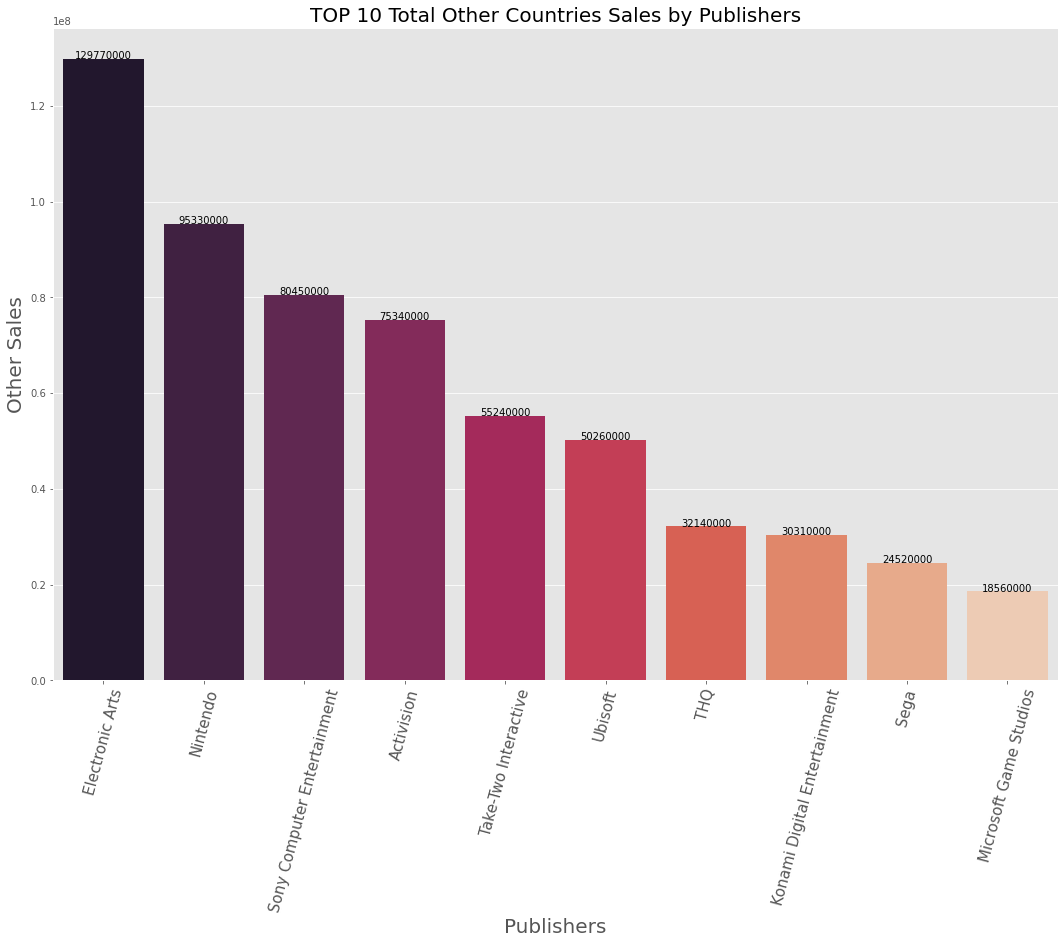

In [ ]:
publi = videogames['Publisher'].unique().tolist()
sales_publi = []
for i in publi:
  sales_publi.append(int(videogames[videogames['Publisher']==i]['Other_Sales'].sum()*1000000))

dict = {}
for publisher,sale in zip(publi,sales_publi):
  dict[publisher] = sale

x = []
y=[]
for i in sorted(dict, key=dict.get, reverse=True):
  x.append(i)
  y.append(dict[i])


data = pd.DataFrame()
data['Publishers'] = x[0:10]
data['Other Sales']= y[0:10]
plt.figure(figsize=(18, 12))
plt.style.use("ggplot")
plt.title('TOP 10 Total Other Countries Sales by Publishers',fontsize = 20)
sns.barplot(x='Publishers', y="Other Sales", data=data,palette = 'rocket')
for i in range(len(data['Other Sales'])):
    plt.text(i,data['Other Sales'][i],data['Other Sales'][i],horizontalalignment='center')
plt.ylabel('Other Sales', fontsize = 20)
plt.xlabel('Publishers', fontsize = 20)
plt.xticks(rotation=75,fontsize =15)
plt.show()

# Comparação entre geração
 - Playstation e Xbox
 - Playstation vs playstation
 - Xbox vs xbox

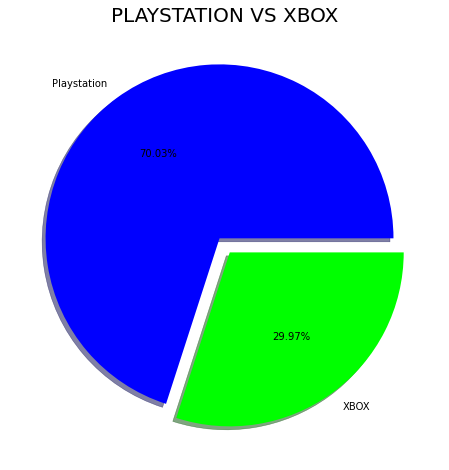

In [ ]:
df_playstation = videogames[(videogames['Platform']=='PS')|
                            (videogames['Platform']=='PS2')|
                            (videogames['Platform']=='PS3')|
                            (videogames['Platform']=='PS4')]
df_xbox = videogames[(videogames['Platform']=='X360')|
                            (videogames['Platform']=='XB')|
                            (videogames['Platform']=='XOne')]

value_sales_px = df_playstation['Global_Sales'].sum(),df_xbox['Global_Sales'].sum()
colors = sns.color_palette('tab10')
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
plt.pie(value_sales_px,labels= ['Playstation','XBOX'],autopct='%1.2f%%',shadow=True,explode=[0.05,0.05],colors = ['#0000FF','#00ff00'] )
plt.title('PLAYSTATION VS XBOX',fontsize = 20)
plt.show()

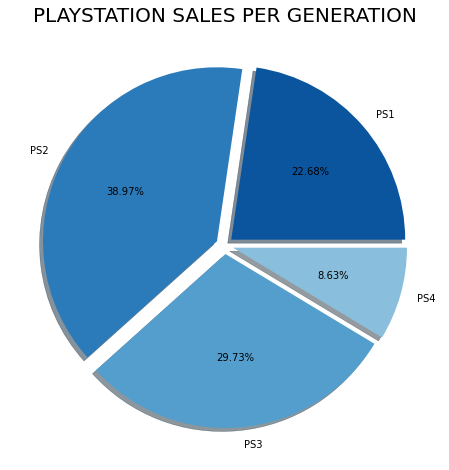

In [ ]:
value_sales_per_ps = (df_playstation[df_playstation['Platform']=='PS']['Global_Sales'].sum(),
                      df_playstation[df_playstation['Platform']=='PS2']['Global_Sales'].sum(),
                      df_playstation[df_playstation['Platform']=='PS3']['Global_Sales'].sum(),
                      df_playstation[df_playstation['Platform']=='PS4']['Global_Sales'].sum())
colors = sns.color_palette('Blues_r')
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
plt.pie(value_sales_per_ps,labels= ['PS1','PS2','PS3','PS4'],autopct='%1.2f%%',shadow=True,explode=[0.05,0.05,0.05,0.05],colors = colors)
plt.title('PLAYSTATION SALES PER GENERATION',fontsize = 20)
plt.show()

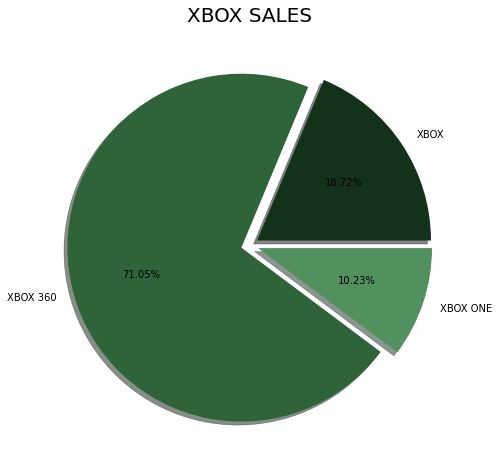

In [ ]:
value_sales_per_xbox = (df_xbox[df_xbox['Platform']=='XB']['Global_Sales'].sum(),
                      df_xbox[df_xbox['Platform']=='X360']['Global_Sales'].sum(),
                      df_xbox[df_xbox['Platform']=='XOne']['Global_Sales'].sum())

colors = sns.cubehelix_palette(start=2, rot=0, light=.95, reverse=True)
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
plt.pie(value_sales_per_xbox,labels= ['XBOX','XBOX 360','XBOX ONE'],autopct='%1.2f%%',shadow=True,explode=[0.05,0.05,0.05],colors = colors)
plt.title('XBOX SALES',fontsize = 20)
plt.show()

# Gráfico de Correlação

In [ ]:
videogames_corr = videogames.corr()

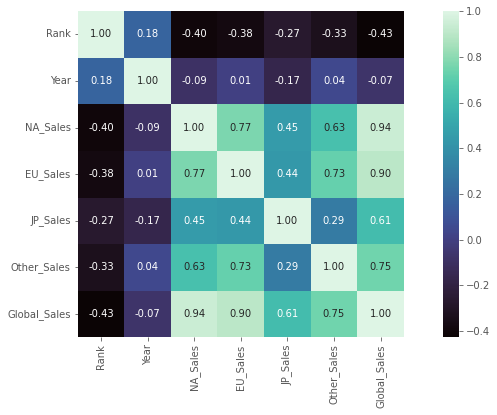

In [ ]:
fig, ax =  plt.subplots(figsize=(14,6))
ax = sns.heatmap(videogames_corr, annot=True, fmt='.2f',cmap='mako',square=True)

# Média, Mediana das Variáveis mais importantes

In [ ]:
videogames.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

# Analisar gêneros

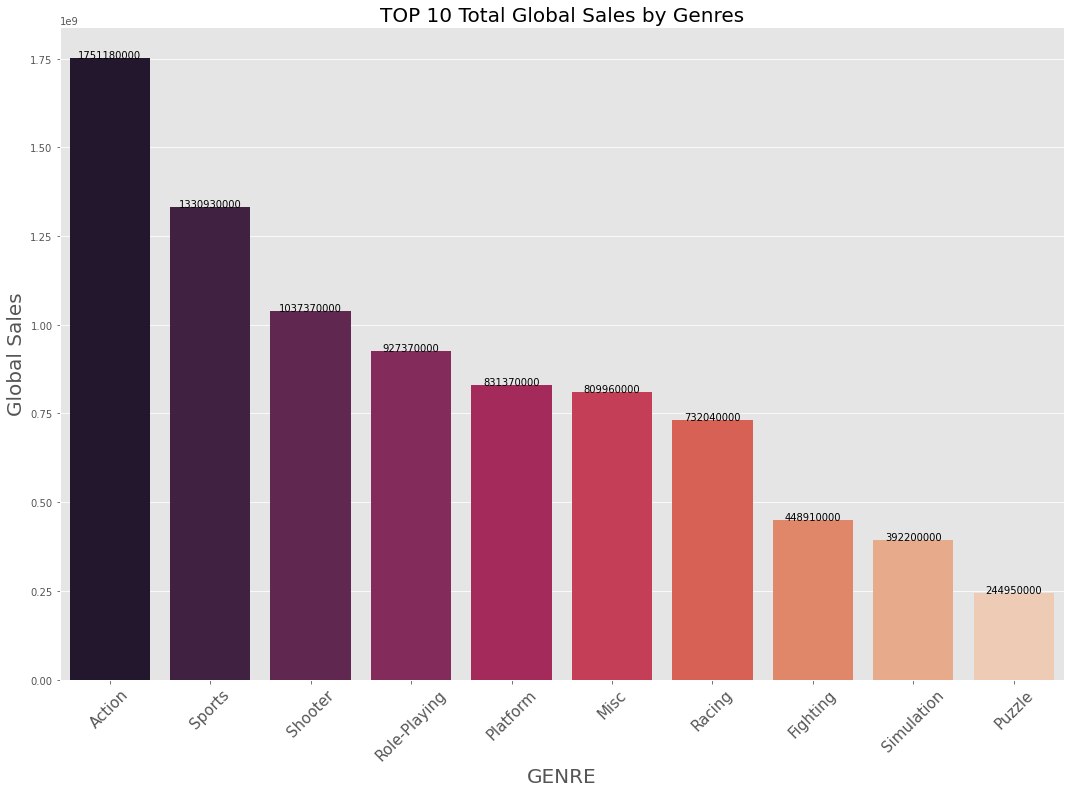

In [ ]:
publi = videogames['Genre'].unique().tolist()
sales_publi = []
for i in publi:
  sales_publi.append(int(videogames[videogames['Genre']==i]['Global_Sales'].sum()*1000000))

dict = {}
for publisher,sale in zip(publi,sales_publi):
  dict[publisher] = sale
dict

x = []
y=[]
for i in sorted(dict, key=dict.get, reverse=True):
  x.append(i)
  y.append(dict[i])


data = pd.DataFrame()
data['Genre'] = x[0:10]
data['Global Sales']= y[0:10]
plt.figure(figsize=(18, 12))
plt.style.use("ggplot")
plt.title('TOP 10 Total Global Sales by Genres',fontsize = 20)
sns.barplot(x='Genre', y="Global Sales", data=data, palette = 'rocket')
for i in range(len(data['Global Sales'])):
    plt.text(i,data['Global Sales'][i],data['Global Sales'][i],horizontalalignment='center')
plt.ylabel('Global Sales', fontsize = 20)
plt.xlabel('GENRE', fontsize = 20)
plt.xticks(rotation=45,fontsize = 15)
plt.show()

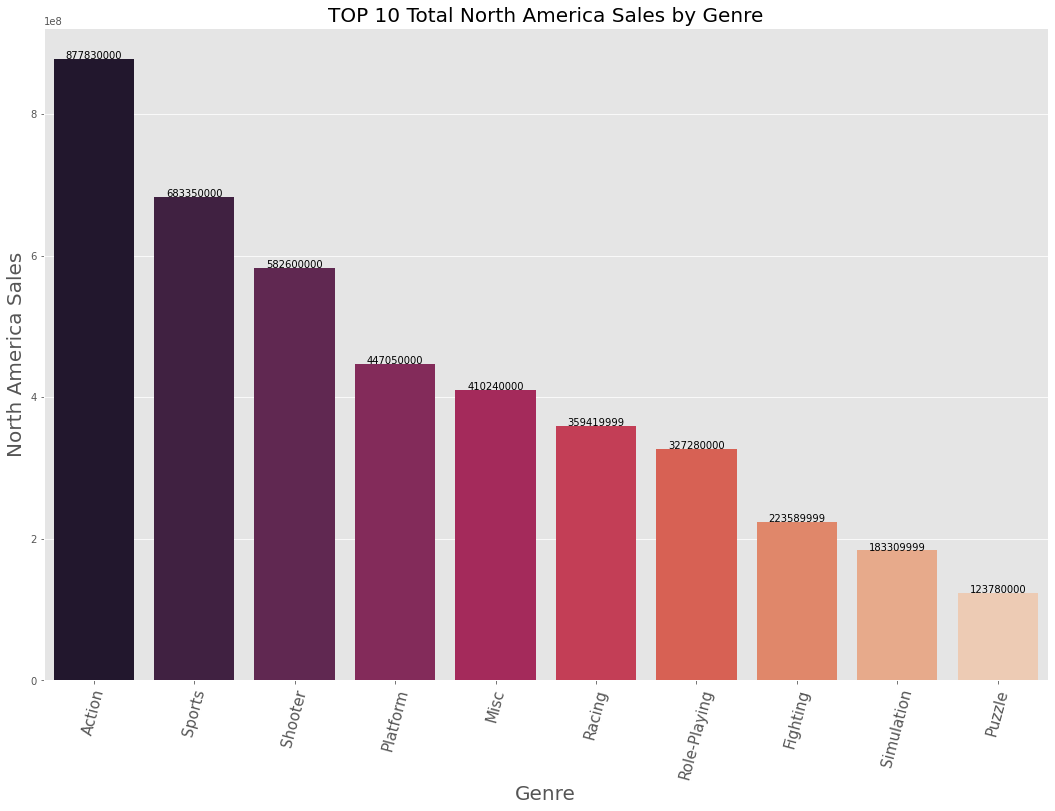

In [ ]:
publi = videogames['Genre'].unique().tolist()
sales_publi = []
for i in publi:
  sales_publi.append(int(videogames[videogames['Genre']==i]['NA_Sales'].sum()*1000000))

dict = {}
for publisher,sale in zip(publi,sales_publi):
  dict[publisher] = sale
dict

x = []
y=[]
for i in sorted(dict, key=dict.get, reverse=True):
  x.append(i)
  y.append(dict[i])


data = pd.DataFrame()
data['Publishers'] = x[0:10]
data['NA Sales']= y[0:10]
plt.figure(figsize=(18, 12))
plt.style.use("ggplot")
plt.title('TOP 10 Total North America Sales by Genre',fontsize = 20)
sns.barplot(x='Publishers', y="NA Sales", data=data,palette = 'rocket')
for i in range(len(data['NA Sales'])):
    plt.text(i,data['NA Sales'][i],data['NA Sales'][i],horizontalalignment='center')
plt.ylabel('North America Sales', fontsize = 20)
plt.xlabel('Genre', fontsize = 20)
plt.xticks(rotation=75,fontsize =15)
plt.show()

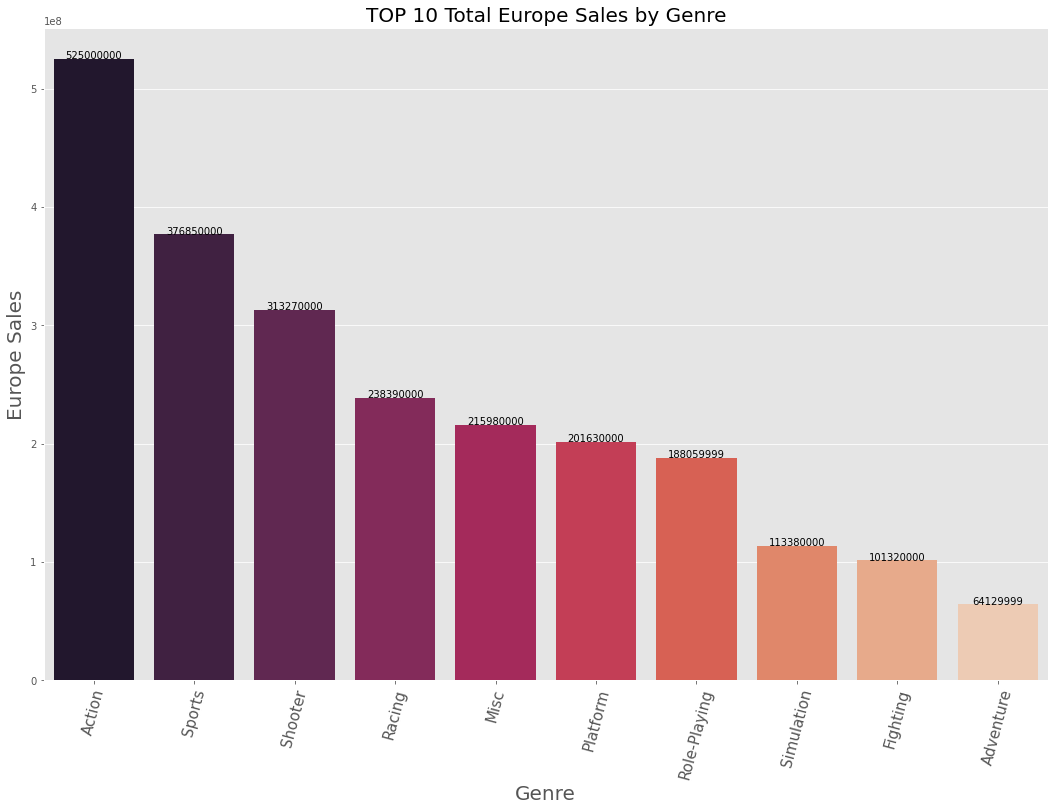

In [ ]:
publi = videogames['Genre'].unique().tolist()
sales_publi = []
for i in publi:
  sales_publi.append(int(videogames[videogames['Genre']==i]['EU_Sales'].sum()*1000000))

dict = {}
for publisher,sale in zip(publi,sales_publi):
  dict[publisher] = sale

x = []
y=[]
for i in sorted(dict, key=dict.get, reverse=True):
  x.append(i)
  y.append(dict[i])


data = pd.DataFrame()
data['Publishers'] = x[0:10]
data['EU Sales']= y[0:10]
plt.figure(figsize=(18, 12))
plt.style.use("ggplot")
plt.title('TOP 10 Total Europe Sales by Genre',fontsize = 20)
sns.barplot(x='Publishers', y="EU Sales", data=data,palette = 'rocket')
for i in range(len(data['EU Sales'])):
    plt.text(i,data['EU Sales'][i],data['EU Sales'][i],horizontalalignment='center')
plt.ylabel('Europe Sales', fontsize = 20)
plt.xlabel('Genre', fontsize = 20)
plt.xticks(rotation=75,fontsize =15)
plt.show()

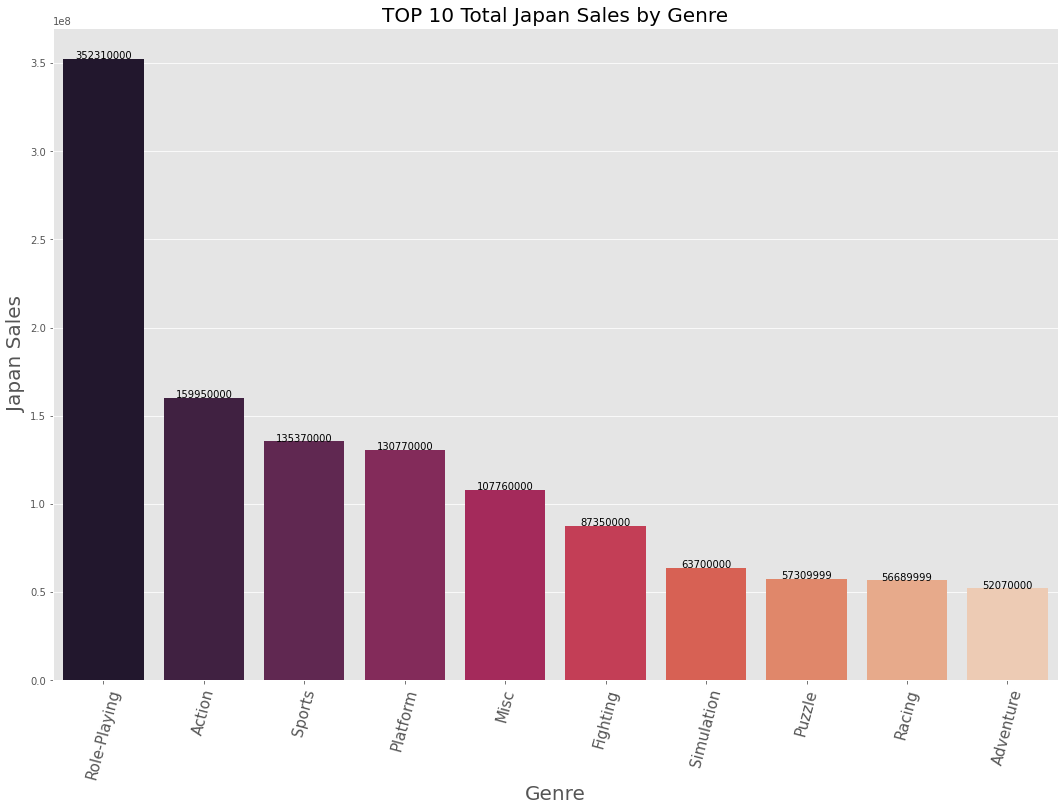

In [ ]:
publi = videogames['Genre'].unique().tolist()
sales_publi = []
for i in publi:
  sales_publi.append(int(videogames[videogames['Genre']==i]['JP_Sales'].sum()*1000000))

dict = {}
for publisher,sale in zip(publi,sales_publi):
  dict[publisher] = sale

x = []
y=[]
for i in sorted(dict, key=dict.get, reverse=True):
  x.append(i)
  y.append(dict[i])


data = pd.DataFrame()
data['Publishers'] = x[0:10]
data['JP Sales']= y[0:10]
plt.figure(figsize=(18, 12))
plt.style.use("ggplot")
plt.title('TOP 10 Total Japan Sales by Genre',fontsize = 20)
sns.barplot(x='Publishers', y="JP Sales", data=data,palette = 'rocket')
for i in range(len(data['JP Sales'])):
    plt.text(i,data['JP Sales'][i],data['JP Sales'][i],horizontalalignment='center')
plt.ylabel('Japan Sales', fontsize = 20)
plt.xlabel('Genre', fontsize = 20)
plt.xticks(rotation=75,fontsize =15)
plt.show()

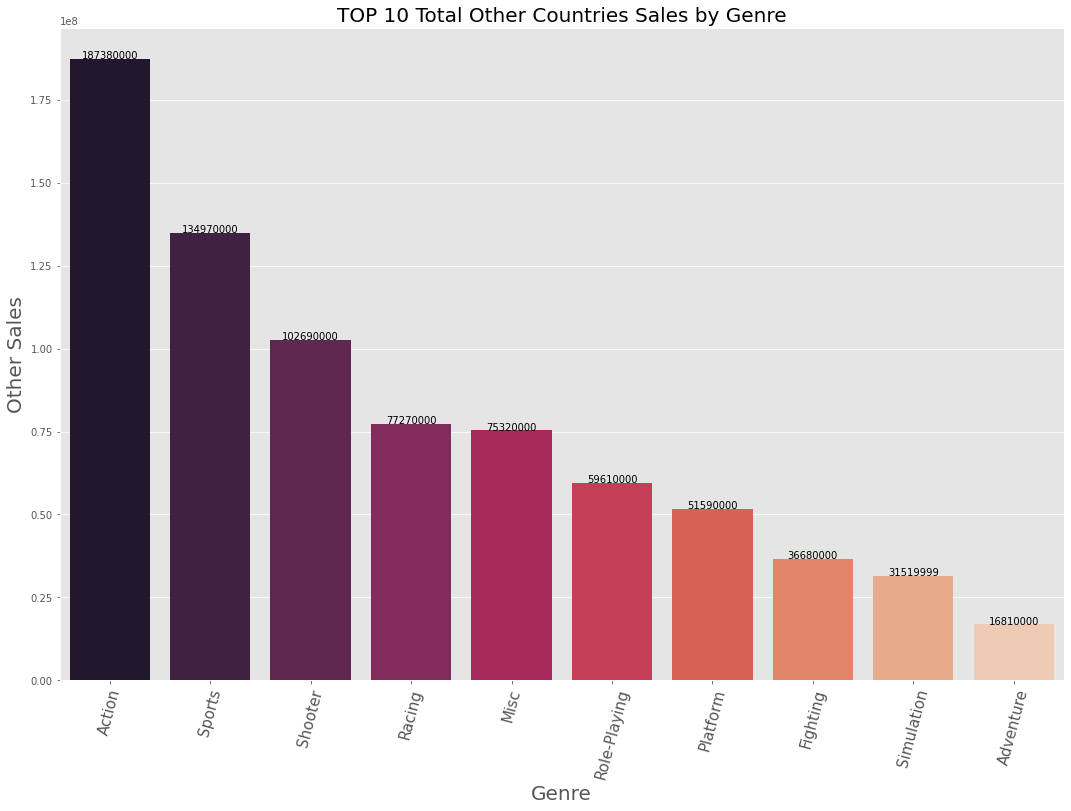

In [ ]:
publi = videogames['Genre'].unique().tolist()
sales_publi = []
for i in publi:
  sales_publi.append(int(videogames[videogames['Genre']==i]['Other_Sales'].sum()*1000000))

dict = {}
for publisher,sale in zip(publi,sales_publi):
  dict[publisher] = sale

x = []
y=[]
for i in sorted(dict, key=dict.get, reverse=True):
  x.append(i)
  y.append(dict[i])


data = pd.DataFrame()
data['Publishers'] = x[0:10]
data['Other Sales']= y[0:10]
plt.figure(figsize=(18, 12))
plt.style.use("ggplot")
plt.title('TOP 10 Total Other Countries Sales by Genre',fontsize = 20)
sns.barplot(x='Publishers', y="Other Sales", data=data,palette = 'rocket')
for i in range(len(data['Other Sales'])):
    plt.text(i,data['Other Sales'][i],data['Other Sales'][i],horizontalalignment='center')
plt.ylabel('Other Sales', fontsize = 20)
plt.xlabel('Genre', fontsize = 20)
plt.xticks(rotation=75,fontsize =15)
plt.show()